# Fourier series

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

## Sinusoids

The sine and cosine functions (with the same amplitude and frequency) are different only by a constant phase $(^\pi/_2)$:  

$$\cos(t)=\sin(t+^\pi/_2) \quad , \quad \sin(t)=\cos(t-^\pi/_2)$$

This means for instance that we can use only sines to represent both sines and cosines. Because of that we can refer to both sine and cosine waves as sinusoids. The relation between the sine and cosine functions can be verified using the trigonometric identities, for example:

$$ \sin(\alpha + ^\pi/_2) = \sin{\alpha} \cos{^\pi/_2} + \cos{\alpha} \sin{^\pi/_2} = \cos{\alpha} $$

$$ \cos(\alpha - ^\pi/_2) = \cos{\alpha} \cos{^\pi/_2} + \sin{\alpha} \sin{^\pi/_2} = \sin{\alpha} $$

Sinusoids are periodic functions, that is, if their period is $T$, then $ x(t+T) = x(t)$.

A cosine is an even function and the sine an odd function, as illustrated next.

In the XIX century, the French mathematician [Jean-Baptiste Joseph Fourier](http://en.wikipedia.org/wiki/Joseph_Fourier) made the discovery that any (in fact, almost any) complicated but periodic function could be represented as a sum of sines and cosines with varying amplitudes and frequencies, which are known as the [Fourier series](http://en.wikipedia.org/wiki/Fourier_series), in his honor.  
Based on the Fourier series, he also proposed a mathematical transformation to transform functions between time (or spatial) domain and frequency domain, known as the [Fourier transform](http://en.wikipedia.org/wiki/Fourier_transform).  
Nowadays, the Fourier transform is typically implemented employing an algorithm known as the [Fast Fourier Transform (FFT)](http://en.wikipedia.org/wiki/Fast_Fourier_transform).  

Let's look at some basic concepts about sinusoids and then we will look at the Fourier series.  
You should be familiar with [basic trigonometry](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/TrigonometryBasics.ipynb) and the [basic properties of signals](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/SignalBasicProperties.ipynb) before proceeding.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')  # directory of BMC Python functions

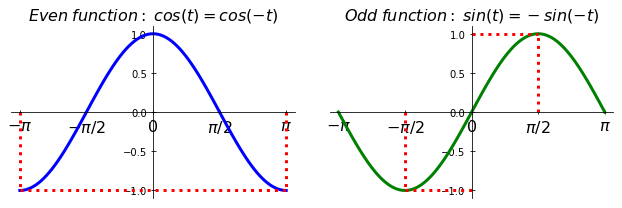

In [2]:
from even_odd_plot import even_odd_plot
ax = even_odd_plot()

### Integral of sinusoids

The integral of a sine or cosine function over one period (as matter of fact, over any integer multiple of the period) is zero:

$$ \int_{t_0}^{t_0+T} \sin(k \frac{2 \pi}{T} t) \:\mathrm{d}t = 0 $$

$$ \int_{t_0}^{t_0+T} \cos(k \frac{2 \pi}{T} t) \:\mathrm{d}t = 0 $$

Where $k$ is an integer and $ \sin(k2\pi t/T) $ or $ \cos(k2\pi t/T) $ are the harmonics with periodicities $T/k$.  

This means that the total area over one period under the sine or cosine curve is zero; in other words, the average value of these functions is zero (the average value is the integral (area) over one period divided by the period), as illustrated in the next figure.

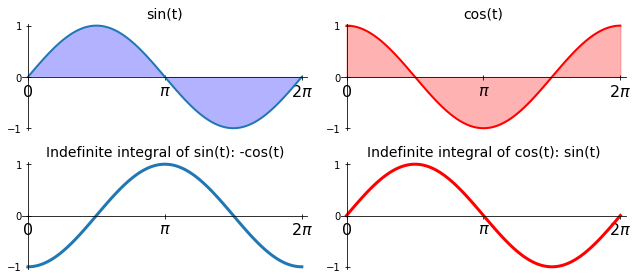

In [3]:
from sinusoid_int_plot import sinusoid_int_plot
ax = sinusoid_int_plot()

### Orthogonality of sinusoids

Another important property of sinusoids is that they are orthogonal at different frequencies and cosines and sines are always orthogonal to each other. That is, if we multiply two sinusoids and integrate over one period the value is zero if the frequencies are different:

$$ \int_{t_0}^{t_0+T} \sin(m \frac{2 \pi}{T}  t)\sin(n \frac{2 \pi}{T}  t) \:\mathrm{d}t = \left\{ 
\begin{array}{l l}
    0 & \quad \text{if } m \neq n \\
    T/2 & \quad \text{if } m = n \neq 0
\end{array} \right. $$

$$ \int_{t_0}^{t_0+T} \cos(m \frac{2 \pi}{T}  t)\cos(n \frac{2 \pi}{T}  t) \:\mathrm{d}t = \left\{ 
\begin{array}{l l}
    0 & \quad \text{if } m \neq n \\
    T/2 & \quad \text{if } m = n \neq 0
\end{array} \right. $$

And:

$$ \int_{t_0}^{t_0+T} \sin(m \frac{2 \pi}{T}  t)\cos(n \frac{2 \pi}{T}  t) \:\mathrm{d}t = 
\begin{array}{l l}
    0, & \quad \quad \text{for all } n, m
\end{array} $$

The term orthogonal here means independent and has a similar meaning as in linear algebra. It's not that cosines and sines are geometrically perpendicular to each other as are two orthogonal vectors in 3D space, but rather the fact that one vector (or sinusoid) cannot be expressed in terms of the other. For example, the following set forms an orthogonal set:

$$ 1, \cos x, \sin x, cos 2x, \sin 2x, \dots $$

From linear algebra, we know that three orthogonal vectors in 3D space can form a basis, a set of linearly independent vectors that, in a linear combination, can represent every vector. In this sense, cosines and sines can also form a basis and they can be used in a linear combination to represent other mathematical functions. This is the essence of the Fourier series.

### Euler's formula

There is an interesting relationship between the sine, cosine, and exponential functions and complex numbers, known as the [Euler's formula](http://en.wikipedia.org/wiki/Euler%27s_formula):

$$ e^{i\theta} = \cos \theta + i \sin \theta $$

Where $e$ is the <a href="http://en.wikipedia.org/wiki/E_(mathematical_constant)">Napier's constant or Euler's number</a> ($e=2.71828...$, the limit of $(1 + 1/n)^n$ as $n$ approaches infinity, and it's also the inverse of the [natural logarithm](http://en.wikipedia.org/wiki/Natural_logarithm) function: $ln(e)=1$) and $i$ is the [imaginary unit](http://en.wikipedia.org/wiki/Imaginary_number) ($\sqrt{-1}=i$).  
Using the Euler's formula, we can express the cosine and sine functions as:

$$ \cos \theta = \frac{e^{i\theta} + e^{-i\theta}}{2}  $$

$$ \sin \theta = \frac{e^{i\theta} - e^{-i\theta}}{2i}  $$

Of note, a special case of the Euler's formula, known as the [Euler's identity](http://en.wikipedia.org/wiki/Euler's_identity), has been referred as one of the most beautiful equations [[1](http://en.wikipedia.org/wiki/Mathematical_beauty)]:

$$ e^{i\pi} + 1 = 0 $$

It may sound strange why one would use exponential functions and complex numbers instead of the 'simpler' sine and cosine functions, but it turns out that calculating the Fourier series is simpler with the exponential form.

## Fourier series

Without further ado, a periodic function can be represented as a sum of sines and cosines, known as the [Fourier series](http://en.wikipedia.org/wiki/Fourier_series):

$$ x(t) \sim \sum_{k=0}^\infty a_k \cos\left(k\frac{2\pi}{T}t\right) + b_k \sin\left(k\frac{2\pi}{T}t\right) $$

Where $a_k$ and $b_k$ are the Fourier coefficients.  

When $k=0$, $\cos(0t)=1$ and $\sin(0t)=0$, then the Fourier series can be written as:

$$ x(t) \sim a_0 + \sum_{k=1}^\infty a_k \cos\left(k\frac{2\pi}{T}t\right) + b_k \sin\left(k\frac{2\pi}{T}t\right) $$

### Determination of the Fourier coefficients

Let's deduce how to calculate the Fourier coefficients $a_0$, $a_k$, and $b_k$.  
The coefficient $a_0$ can be computed if we integrate the Fourier series over one period:

$$ \int_{t_0}^{t_0+T} x(t) \mathrm{d}t = \int_{t_0}^{t_0+T} \left[ a_0 dt + \sum_{k=1}^\infty a_k \cos\left(k\frac{2\pi}{T}t\right) + b_k \sin\left(k\frac{2\pi}{T}t\right) \right] \:\mathrm{d}t $$

On the right side, the first term is the integral of a constant and the integral of the summation is zero because it's the integral over one period of sines and cosines. Then:

$$ a_0 = \frac{1}{T} \int_{t_0}^{t_0+T} x(t) \:\mathrm{d}t $$

Which is the average value of the function $x(t)$ over the period $T$. 

The coefficients $a_n$ and $b_n$ can be computed if we multiply the Fourier series respectively by $cos(\cdot)$ and $sin(\cdot)$ and integrate over one period (deduction not shown):

$$ a_k = \frac{2}{T} \int_{t_0}^{t_0+T} x(t) \cos\left(k\frac{2\pi}{T}t\right) \:\mathrm{d}t $$

$$ b_k = \frac{2}{T} \int_{t_0}^{t_0+T} x(t) \sin\left(k\frac{2\pi}{T}t\right) \:\mathrm{d}t $$

Note that $a_n$ and $b_n$ have the integrals multiplied by 2 while $a_0$ does not have this multiplication. Because of that, to make the equation for $a_0$ consistent with the equations for $a_n$ and $b_n$, it's common to also multiply by 2 the equation for $a_0$ and then express the Fourier series as:

$$ x(t) \sim \frac{a_0}{2} + \sum_{k=1}^\infty a_k \cos\left(k\frac{2\pi}{T}t\right) + b_k \sin\left(k\frac{2\pi}{T}t\right) $$

### Convergence of the Fourier series

The Fourier series is an expansion of a function and the following theorem states that the Fourier series actually converges to the function:

> The Fourier series of a piecewise continuous function $f(x)$ converges for all values of $x$ where $f(x)$ is continuous. At the values where $f(x)$ is discontinuous, the Fourier series is equal to the average of the right and left limits of $f(x)$:

$$ \frac{1}{2}\left[f(x^+) + f(x^-)\right] $$

### Example: Fourier series for a square wave function

Consider the following periodic function (a square wave with period $T=2\:s$):

$$ x(t) = \left\{ 
\begin{array}{l l}
    -1 & \quad \text{if } -1 \leq t < 0\\
    +1 & \quad \text{if } 0 \leq t < +1
\end{array} \right. $$
  
$$ x(t + 2) = x(t), \quad \text{for all } t$$

Note that this function is discontinuous at $ t=\dots,-3,-2,-1,\;0,\;1,\;2,\;3,\dots$.

Which has the following plot:

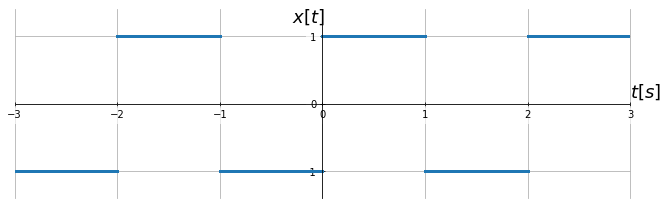

In [4]:
from square_wave_plot import square_wave_plot
ax = square_wave_plot()
%config InlineBackend.close_figures=False  # hold plot for next cell

The Fourier coefficients are given by ($a_0=0$ because the average value of $x(t)$ is zero):

$$ a_k = \frac{2}{2}\left[\int_{-1}^0 -\cos\left(k\frac{2\pi}{2}t\right) \:\mathrm{d}t + \int_{0}^1 \cos\left(k\frac{2\pi}{2}t\right) \:\mathrm{d}t \right] $$

$$ b_k = \frac{2}{2}\left[\int_{-1}^0 -\sin\left(k\frac{2\pi}{2}t\right) \:\mathrm{d}t + \int_{0}^1 \sin\left(k\frac{2\pi}{2}t\right) \:\mathrm{d}t \right] $$

Which results in:

$$ a_k = 0 $$

$$ b_k = \left\{ 
\begin{array}{c l}
    0 & \quad \text{if k is even} \\
    \frac{4}{k\pi} & \quad \text{if k is odd}
\end{array} \right. $$

Then, the Fourier series for $x(t)$ is:

$$ x(t) = \frac{4}{\pi} \left[ \sin(\pi t) + \frac{\sin(3\pi t)}{3} + \frac{\sin(5\pi t)}{5} + \frac{\sin(7\pi t)}{7} + \frac{\sin(9\pi t)}{9} + \dots \right] $$

The fact that the Fourier series of the given square wave has only sines is expected because the given square wave is an odd function, $x(t) = -x(-t)$. Then, its Fourier series should have only odd functions (sines). 

Let's plot it:

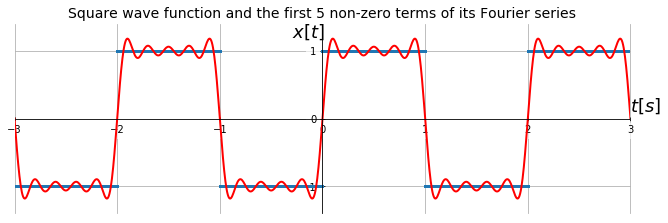

In [5]:
t = np.linspace(-3, 3, 1000)
x = 4/np.pi*(np.sin(1*np.pi*t)/1 + np.sin(3*np.pi*t)/3 + np.sin(5*np.pi*t)/5 +
             np.sin(7*np.pi*t)/7 + np.sin(9*np.pi*t)/9)

ax.plot(t, x, color='r', linewidth=2, label='Fourier series')
ax.set_title('Square wave function and the first 5 non-zero terms of its Fourier series',
             fontsize=14)
%config InlineBackend.close_figures=True  # hold off the figure
plt.show()

And here are plots for each of the first five non-zero components:

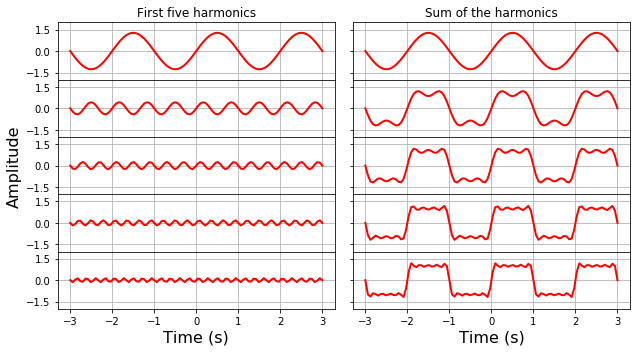

In [6]:
t = np.linspace(-3, 3, 100)
fig, axs = plt.subplots(5, 2, figsize=(9, 5), sharex=True, sharey=True, squeeze=True)
axs = axs.flat
x2 = t*0
for k, ax in enumerate(axs):
    if ~k%2:
        xf = 4/np.pi*np.sin((k+1)*np.pi*t)/(k+1)
        ax.plot(t, xf, 'r', linewidth=2)
        x2 = x2 + xf
    else:
        ax.plot(t, x2, 'r', linewidth=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim(-2, 2)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.grid()
ax.set_xlabel('Time (s)', fontsize=16)
axs[-2].set_xlabel('Time (s)', fontsize=16)
axs[4].set_ylabel('Amplitude', fontsize=16)
axs[0].set_title('First five harmonics')
axs[1].set_title('Sum of the harmonics')
fig.tight_layout()
plt.subplots_adjust(hspace=0)

This animation resumes the steps we have done to compute the Fourier series of a square wave function:  
<div class='center-align'><figure><img src="http://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif" alt="Fourier series" /><figcaption><center><i>Figure. Fourier series of a square wave function (<a href="http://en.wikipedia.org/wiki/Fourier_series" target="_blank">from Wikipedia</a>).</i></center></figcaption></figure></div>

### Example: Fourier series for a triangular wave function

Consider the following periodic function (a triangular wave with period $T=2\pi$):

$$ x(t) = \left\{ 
\begin{array}{l l}
    1+t/\pi & \quad \text{if } -\pi \leq t < 0\\
    1-t/\pi & \quad \text{if } 0 \leq t < +\pi
\end{array} \right. $$
  
$$ x(t + 2\pi) = x(t), \quad \text{for all } t$$

Which has the following plot:

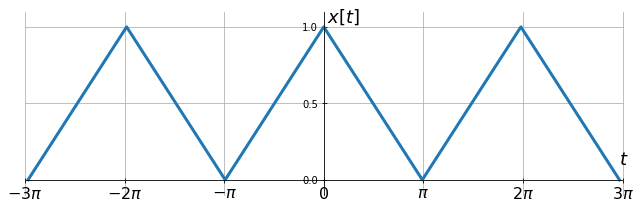

In [7]:
from triangular_wave_plot import triangular_wave_plot
ax = triangular_wave_plot()
%config InlineBackend.close_figures=False  # hold plot for next cell

The Fourier coefficients are given by:

$$ a_0 = \frac{1}{2\pi} \left[ \int_{-\pi}^0 \left(1+t/\pi\right) \:\mathrm{d}t + \int_{0}^{\pi} \left(1-t/\pi\right) \:\mathrm{d}t \right] $$

$$ a_k = \frac{1}{\pi} \left[ \int_{-\pi}^0 \left(1+t/\pi\right)\cos\left(k\frac{2\pi}{T}t\right) \:\mathrm{d}t + \int_{0}^{\pi} \left(1-t/\pi\right)\cos\left(k\frac{2\pi}{T}t\right) \:\mathrm{d}t \right] $$

$$ b_k = \frac{1}{\pi} \left[ \int_{-pi}^0 \left(1+t/\pi\right)\sin\left(k\frac{2\pi}{T}t\right) \mathrm{d}t + \int_{0}^{\pi} \left(1-t/\pi\right)\sin\left(k\frac{2\pi}{T}t\right) \:\mathrm{d}t \right] $$

Which results in:

$$ a_0 = 1/2 $$

$$ a_k = \left\{ 
\begin{array}{c l}
    \frac{4}{k^2\pi^2} & \quad \text{if k is odd} \\
    0 & \quad \text{if k is even}
\end{array} \right. $$

$$ b_k = 0 $$

Then, the Fourier series for $x(t)$ is:

$$ x(t) = \frac{1}{2} + \frac{4}{\pi^2} \left[ \cos(t) + \frac{\cos(3 t)}{3^2} + \frac{\cos(5 t)}{5^2} + \frac{\cos(7 t)}{7^2} + \frac{\cos(9 t)}{9^2} + \dots \right] $$

The given triangular wave is an even function, $x(t)=x(-t)$, and then its Fourier series has only even functions (cosines).

Let's plot it:

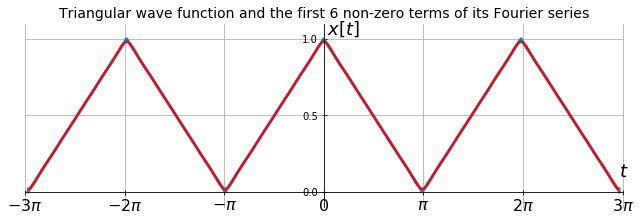

In [8]:
t = np.linspace(-3*np.pi, 3*np.pi, 1000)
x = 1/2 + 4/np.pi**2*(np.cos(t) + np.cos(3*t)/9 + np.cos(5*t)/25 +
             np.cos(7*t)/49 + np.cos(9*t)/81)

ax.plot(t, x, color='r', linewidth=2, label='Fourier series')
ax.set_title('Triangular wave function and the first 6 non-zero terms of its Fourier series',
             fontsize=14)
#ax.legend(frameon=False, loc='center right', framealpha=.5, fontsize=14)
%config InlineBackend.close_figures=True  # hold off the figure
plt.show()

And here are plots for each of the first six non-zero components:

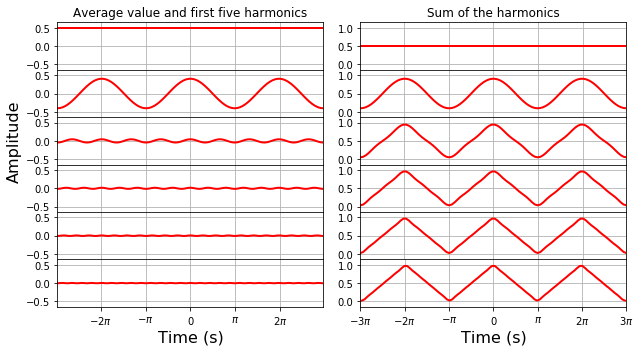

In [9]:
t = np.linspace(-3*np.pi, 3*np.pi, 100)
fig, axs = plt.subplots(6, 2, figsize=(9, 5), sharex=True, squeeze=True)
axs = axs.flat
for k, ax in enumerate(axs):
    if k == 0:
        x2 = .5*t/t
        ax.plot(t, x2, 'r', linewidth=2)
        ax.set_ylim(-.65, .65)
        ax.set_yticks([-.5, 0, .5])
    elif ~k%2:
        xf = 4/((k-1)*np.pi)**2*np.cos((k-1)*t)
        ax.plot(t, xf, 'r', linewidth=2)
        x2 = x2 + xf
        ax.set_ylim(-.65, .65)
        ax.set_yticks([-.5, 0, .5])
    else:
        ax.plot(t, x2, 'r', linewidth=2)
        ax.set_ylim(-.15, 1.15)
        ax.set_yticks([0, 0.5, 1])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim((-3*np.pi, 3*np.pi))
    ax.grid()
ax.set_xticks(np.linspace(-3*np.pi-0.1, 3*np.pi+0.1, 7))
ax.set_xticklabels(['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
ax.set_xlabel('Time (s)', fontsize=16)
axs[-2].set_xlabel('Time (s)', fontsize=16)
axs[4].set_ylabel('Amplitude', fontsize=16)
axs[0].set_title('Average value and first five harmonics')
axs[1].set_title('Sum of the harmonics')
fig.tight_layout()
plt.subplots_adjust(hspace=0)

### Amplitude and phase of the frequency components in the Fourier series

The $a_k$ and $b_k$ coefficients are the amplitudes of the sine and cosine terms, each with frequency $k/T$, of the Fourier series.  
We can express the Fourier series in a more explicit form with a single amplitude and phase using the trigonometric identities:

$$ x(t) = c_0 + \sum_{k=1}^\infty c_k \sin\left(k\frac{2\pi}{T}t + \theta_k \right) $$

or

$$ x(t) = c_0 + \sum_{k=1}^\infty c_k \cos\left(k\frac{2\pi}{T}t - \theta_k \right) $$

Where:

$$ c_0=a_0 \quad , \quad c_k = \sqrt{a_k^2 + b_k^2} \quad , \quad \theta_k = \tan^{-1}\left(\frac{b_k}{a_k}\right) $$

The energy or power of each harmonic, which is proportional to the amplitude squared, is given by:

$$ P_k = c_k^2 = a_k^2 + b_k^2 $$

The plot of the amplitude (or power) and phase of each harmonic as a function of the corresponding frequency is called the amplitude (or power) spectrum and phase spectrum, respectively. These spectra are very useful to visualize the frequency content of a function.

### The complex form of the Fourier series

Using the Euler's formula, the complex form of the Fourier series is:

$$ x(t) \sim \sum_{k=-\infty}^\infty c_k \exp\left(ik\frac{2\pi}{T}t\right) $$

It can be shown that the relation between $c_k$, $a_k$, and $b_k$ coefficients is:

$$ c_0 = \frac{a_0}{2} \quad , \quad c_k = \frac{a_k-i b_k}{2} \quad , \quad c_{-k} = \frac{a_k+i b_k}{2}$$
And:
$$ a_k = 2\text{ Real}\{c_k\}  \quad  \text{and}  \quad  b_k = -2\text{ Imag}\{c_k\} $$

The complex Fourier coefficients, $c_k$, can be determined similarly to $a_k$ and $b_k$:

$$ c_k = \frac{1}{T} \int_{t_0}^{t_0+T} x(t)\exp\left(-ik\frac{2\pi}{T}t\right) \:\mathrm{d}t $$

And the amplitudes and phases of the Fourier series in complex form are given by:

$$ |c_k| \, = \, |c_{-k}| \, = \, \frac{1}{2}\sqrt{a_k^2 + b_k^2} \quad , \quad \phi_k \, = \, \tan^{-1}\left(-\frac{b_k}{a_k}\right)\,=\, \tan^{-1}\left(\frac{\text{Imag}\{c_k\}}{\text{Real}\{c_k\}}\right)$$

The complex form is more often used to express the Fourier series and in the calculation of the amplitude (or power) and phase spectra.

### Example: complex form of the Fourier series for a square wave function

Let's calculate again the Fourier series of the square wave function but now using the complex form.

The  $c_k$ coefficients are given by ($c_0=0$ because the average value of $x(t)$ is zero):

$$ c_k = \frac{1}{2}\left[ \int_{-1}^0 -\exp\left(-ik\frac{2\pi}{2}t\right) \:\mathrm{d}t + \int_{0}^1 \exp\left(-ik\frac{2\pi}{2}t\right) \:\mathrm{d}t\right] $$

$$ = \frac{i\:exp(-ik\pi)-i}{k\pi} $$

$$ = \frac{i}{k\pi}\left(\cos(k\pi) - 1\right) $$

Which results in:

$$ c_k = \left\{ 
\begin{array}{c l}
    0 & \quad \text{if k is even} \\
    -\frac{2i}{k\pi} & \quad \text{if k is odd}
\end{array} \right. $$

If you compare with the previous calculation you will notice some differences.  
First, now the expression is multiplied by 2 instead of by 4. But remember that now $k$ goes from $-\infty$ to $\infty$, i.e., we will now add terms for $k=\pm1,\pm2,\pm3,\dots$, meaning that the expression above will be counted twice for each $|k|$.  
Second, the $c_k$ coefficients are purely imaginary; the imaginary part is negative when $k$ is positive and positive when $k$ is negative.

So, the amplitude $\text{A}_k$ and phase $\phi_k$ of each Fourier coefficient for $k > 0$ are:

$$ \text{A}_k = \left\{ 
\begin{array}{c l}
    0 & \quad \text{if k is even} \\
    \frac{2}{k\pi} & \quad \text{if k is odd}
\end{array} \right. $$

$$ \phi_k = \left\{ 
\begin{array}{c l}
    0 & \quad \text{if k is even} \\
    -\frac{\pi}{2} & \quad \text{if k is odd}
\end{array} \right. $$

And the negative of these expressions for $k < 0$.

Let's plot the corresponding amplitude and phase spectra:

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


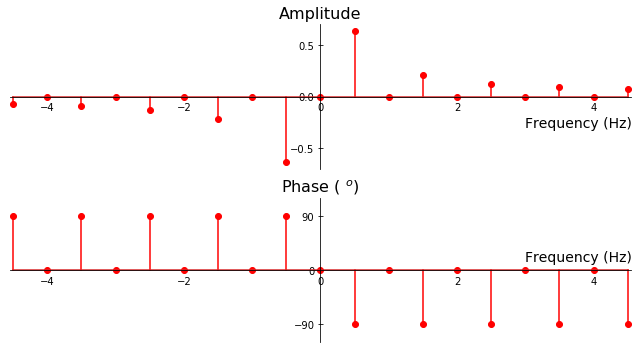

In [10]:
k = np.arange(-9,10)
fk = k/2
ampk = 2/(k*np.pi)
ampk[1::2] = 0
phik = -np.pi/2*(k+.1)/abs(k+.1)*180/np.pi
phik[1::2] = 0

fig, ax = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
ax[0].stem(fk, ampk, markerfmt='ro', linefmt='r-')
ax[0].set_ylim(-.7, .7)
ax[0].annotate('Frequency (Hz)', xy=(3, -.3), xycoords = 'data', color='k',
             size=14, xytext=(0, 0), textcoords = 'offset points')
ax[0].set_title('Amplitude', fontsize=16)
ax[1].stem(fk, phik, markerfmt='ro', linefmt='r-')
ax[1].set_title('Phase ( $^o$)', fontsize=16)
ax[1].set_xlim(-4.55, 4.55)
ax[1].set_ylim(-120, 120)
ax[1].set_yticks([-90, 0, 90])
ax[1].annotate('Frequency (Hz)', xy=(3, 15), xycoords = 'data', color='k',
             size=14, xytext=(0, 0), textcoords = 'offset points')
for axi in ax:
    axi.spines['left'].set_position('zero')
    axi.spines['right'].set_color('none')
    axi.spines['bottom'].set_position('zero')
    axi.spines['top'].set_color('none')
    axi.spines['right'].set_color('none')
    axi.xaxis.set_ticks_position('bottom')
    axi.yaxis.set_ticks_position('left')
    axi.tick_params(axis='both', direction='inout', which='both', length=5)
    axi.locator_params(axis='y', nbins=4)
fig.tight_layout()
plt.subplots_adjust(hspace=0.2)

Usually we don't care for the negative frequencies of real signals and we are more interested in the power of the signal:

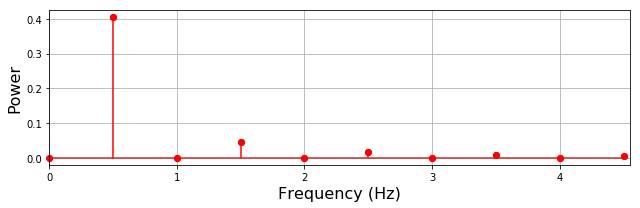

In [13]:
Pk = ampk[int((ampk.size)/2):]**2

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.stem(fk[int((fk.size)/2):], Pk, markerfmt='ro', linefmt='r-')
ax.plot(fk[int((fk.size)/2):], Pk, 'ro', clip_on=False)
ax.set_ylabel('Power', fontsize=16)
ax.set_xlabel('Frequency (Hz)', fontsize=16)
ax.set_xlim(0, 4.55)
ax.grid()
fig.tight_layout()

## Problems

 1. Using a trigonometric identity, verify that $\cos(x)=\sin(x+\pi/2)$.   
 2. Using the Euler's formula, deduce the expressions for sine and cosine.  
 3. Using the complex exponential forms, show that the integrals of the sine and cosine functions are zero.  
 4. Verify that the results of the integrals for the orthogonality of sinusoids are indeed correct.  
 5. Deduce the Fourier series for the triangular wave function using the complex form.  
 6. Deduce the Fourier series for the function $x(t) = t$ in the interval $[0, 1]$.  
 7. Deduce the Fourier series for the saw-tooth function $x(t) = 2t/T$ in the interval $0 \leq t < T/2$ and $x(t)=2(t-T)/T$ in the interval $T/2 \leq t < T$.  
 8. Calculate the power and phase spectra for the functions $x(t) = 2\sin(4\pi t)$ and $x(t) = 2\cos(4\pi t)$.

## References

- James JF (2011) [A Student’s Guide to Fourier Transform](http://books.google.com.br/books?id=_T99VW0ARfkC). 3rd edition. Cambridge.
- Lyons RG (2010) [Understanding Digital Signal Processing](http://books.google.com.br/books?id=UBU7Y2tpwWUC&hl). 3rd edition. Prentice Hall.  
- Robertson G, Caldwell G, Hamill J, Kamen G (2013) [Research Methods in Biomechanics](http://books.google.com.br/books?id=gRn8AAAAQBAJ). 2nd Edition. Human Kinetics.  
- Tang KT (2007) [Mathematical Methods for Engineers and Scientists 3](http://books.google.com.br/books?id=gG-ybR3uIGsC). Springer.  
- Tolstov GP (1976) [Fourier Series](http://books.google.com.br/books/about/Fourier_Series.html?id=XqqNDQeLfAkC). Courier Dover Publications.   